<a href="https://colab.research.google.com/github/2303A51552/HACKATHON/blob/main/Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Choose scan type:
1. Text File
2. Disk Image File (.img/.dd)
Enter your choice (1 or 2): 2
Enter file name: Image.img

[+] Scanning image file...
Suspicious keyword 'malware' found (score 3)
Suspicious keyword 'powershell' found (score 2)

[+] Running anomaly detection (ML)...

[+] Exporting results to JSON and CSV...
✅ Reports saved: report.csv, report.json

[+] Displaying summary chart...


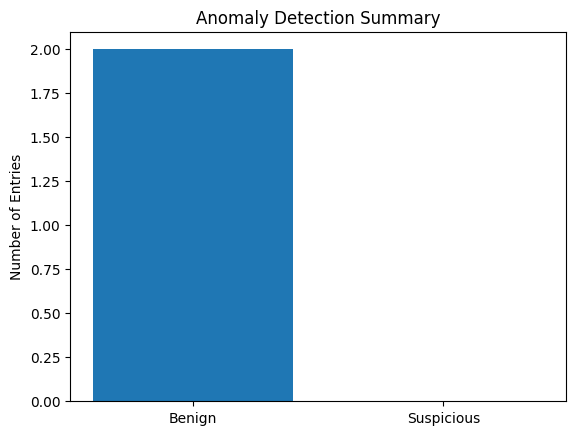

In [5]:
import os
import json
import csv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Suspicious keywords
KEYWORDS = ["malware", "powershell", "cmd.exe", "keylogger"]

# For storing results
detected_items = []

# Scoring system
def get_score(line):
    score = 0
    if "malware" in line: score += 3
    if "powershell" in line: score += 2
    if "keylogger" in line: score += 4
    if "cmd.exe" in line: score += 1
    return score

def scan_text_file(filename):
    print("\n[+] Scanning text file...")
    try:
        with open(filename, 'r', errors='ignore') as f:
            for i, line in enumerate(f, 1):
                score = get_score(line)
                if score > 0:
                    print(f"Suspicious at line {i} (score {score}): {line.strip()}")
                    detected_items.append({
                        "file": filename,
                        "line": i,
                        "content": line.strip(),
                        "score": score
                    })
    except FileNotFoundError:
        print("[-] File not found.")

def scan_image_file(filename):
    print("\n[+] Scanning image file...")
    try:
        with open(filename, 'rb') as f:
            content = f.read().decode(errors='ignore')
            for keyword in KEYWORDS:
                if keyword in content:
                    score = get_score(keyword)
                    print(f"Suspicious keyword '{keyword}' found (score {score})")
                    detected_items.append({
                        "file": filename,
                        "line": "-",
                        "content": keyword,
                        "score": score
                    })
    except FileNotFoundError:
        print("[-] Image file not found.")

# ML anomaly detection (simulated with scores)
def anomaly_detection():
    print("\n[+] Running anomaly detection (ML)...")
    if not detected_items:
        print("No suspicious data to analyze.")
        return

    df = pd.DataFrame(detected_items)
    X = df[['score']]  # Use score as feature
    model = IsolationForest(contamination=0.2)
    df['anomaly'] = model.fit_predict(X)

    for i, row in df.iterrows():
        if row['anomaly'] == -1:
            print(f"⚠ Anomaly: {row['content']} (score {row['score']})")

    return df

# Export reports
def export_reports(df):
    print("\n[+] Exporting results to JSON and CSV...")

    df.to_csv("report.csv", index=False)
    df.to_json("report.json", orient="records", indent=2)

    print("✅ Reports saved: report.csv, report.json")

# Visualization
def show_chart(df):
    print("\n[+] Displaying summary chart...")

    plt.bar(["Benign", "Suspicious"], [
        len(df[df['anomaly'] == 1]),
        len(df[df['anomaly'] == -1])
    ])
    plt.title("Anomaly Detection Summary")
    plt.ylabel("Number of Entries")
    plt.show()

# Main program
def main():
    print("Choose scan type:")
    print("1. Text File")
    print("2. Disk Image File (.img/.dd)")
    choice = input("Enter your choice (1 or 2): ")
    filename = input("Enter file name: ")

    if choice == "1":
        scan_text_file(filename)
    elif choice == "2":
        scan_image_file(filename)
    else:
        print("Invalid choice.")
        return

    df = anomaly_detection()
    if df is not None:
        export_reports(df)
        show_chart(df)

if __name__ == "__main__":
    main()

    #Image file

Choose scan type:
1. Text File
2. Disk Image File (.img/.dd)
Enter your choice (1 or 2): 1
Enter file name: Image.txt

[+] Scanning text file...
Suspicious at line 2 (score 3): It secretly contains the word malware.
Suspicious at line 3 (score 2): Another line with powershell command.

[+] Running anomaly detection (ML)...

[+] Exporting results to JSON and CSV...
✅ Reports saved: report.csv, report.json

[+] Displaying summary chart...


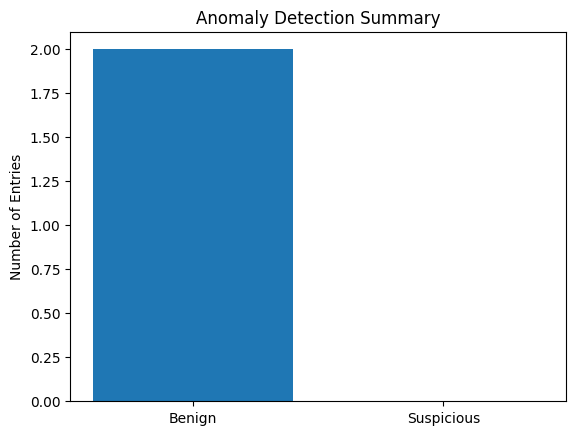

In [6]:
import os
import json
import csv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Suspicious keywords
KEYWORDS = ["malware", "powershell", "cmd.exe", "keylogger"]

# For storing results
detected_items = []

# Scoring system
def get_score(line):
    score = 0
    if "malware" in line: score += 3
    if "powershell" in line: score += 2
    if "keylogger" in line: score += 4
    if "cmd.exe" in line: score += 1
    return score

def scan_text_file(filename):
    print("\n[+] Scanning text file...")
    try:
        with open(filename, 'r', errors='ignore') as f:
            for i, line in enumerate(f, 1):
                score = get_score(line)
                if score > 0:
                    print(f"Suspicious at line {i} (score {score}): {line.strip()}")
                    detected_items.append({
                        "file": filename,
                        "line": i,
                        "content": line.strip(),
                        "score": score
                    })
    except FileNotFoundError:
        print("[-] File not found.")

def scan_image_file(filename):
    print("\n[+] Scanning image file...")
    try:
        with open(filename, 'rb') as f:
            content = f.read().decode(errors='ignore')
            for keyword in KEYWORDS:
                if keyword in content:
                    score = get_score(keyword)
                    print(f"Suspicious keyword '{keyword}' found (score {score})")
                    detected_items.append({
                        "file": filename,
                        "line": "-",
                        "content": keyword,
                        "score": score
                    })
    except FileNotFoundError:
        print("[-] Image file not found.")

# ML anomaly detection (simulated with scores)
def anomaly_detection():
    print("\n[+] Running anomaly detection (ML)...")
    if not detected_items:
        print("No suspicious data to analyze.")
        return

    df = pd.DataFrame(detected_items)
    X = df[['score']]  # Use score as feature
    model = IsolationForest(contamination=0.2)
    df['anomaly'] = model.fit_predict(X)

    for i, row in df.iterrows():
        if row['anomaly'] == -1:
            print(f"⚠ Anomaly: {row['content']} (score {row['score']})")

    return df

# Export reports
def export_reports(df):
    print("\n[+] Exporting results to JSON and CSV...")

    df.to_csv("report.csv", index=False)
    df.to_json("report.json", orient="records", indent=2)

    print("✅ Reports saved: report.csv, report.json")

# Visualization
def show_chart(df):
    print("\n[+] Displaying summary chart...")

    plt.bar(["Benign", "Suspicious"], [
        len(df[df['anomaly'] == 1]),
        len(df[df['anomaly'] == -1])
    ])
    plt.title("Anomaly Detection Summary")
    plt.ylabel("Number of Entries")
    plt.show()

# Main program
def main():
    print("Choose scan type:")
    print("1. Text File")
    print("2. Disk Image File (.img/.dd)")
    choice = input("Enter your choice (1 or 2): ")
    filename = input("Enter file name: ")

    if choice == "1":
        scan_text_file(filename)
    elif choice == "2":
        scan_image_file(filename)
    else:
        print("Invalid choice.")
        return

    df = anomaly_detection()
    if df is not None:
        export_reports(df)
        show_chart(df)

if __name__ == "__main__":
    main()

    #Text File